In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("student-dataset.csv")
print("Aperçu des données :")
print(df.head())

print("\nInformations sur le dataset :")
print(df.info())

print("\nValeurs manquantes :")
print(df.isnull().sum())

Aperçu des données :
  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes  

In [19]:
# Portion 1.5 : Nettoyage des données

# 1. Gestion des valeurs manquantes
# Remplir les valeurs manquantes pour les colonnes numériques avec la médiane
numeric_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Remplir les valeurs manquantes pour les colonnes catégoriques avec le mode
categorical_cols = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID',
                    'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
                    'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Vérifier à nouveau les valeurs manquantes
print("\nValeurs manquantes après imputation :")
print(df.isnull().sum())

# 2. Vérification et correction des types de données
# S'assurer que les colonnes numériques sont bien numériques
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].median(), inplace=True)

# S'assurer que les colonnes catégoriques sont bien des chaînes de caractères
for col in categorical_cols:
    df[col] = df[col].astype(str)

# 3. Suppression des doublons
print("\nNombre de lignes avant suppression des doublons :", len(df))
df.drop_duplicates(inplace=True)
print("Nombre de lignes après suppression des doublons :", len(df))

# 4. Gestion des valeurs aberrantes (outliers) avec la méthode IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"\nValeurs aberrantes dans {col} : {len(outliers)} détectées")
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# 5. Correction des incohérences dans les colonnes catégoriques
# Uniformisation des valeurs (ex. majuscules)
df['gender'] = df['gender'].str.upper()
df['Class'] = df['Class'].str.upper()
df['NationalITy'] = df['NationalITy'].str.capitalize()
df['PlaceofBirth'] = df['PlaceofBirth'].str.capitalize()

# Vérification des valeurs uniques pour détecter d'autres incohérences
for col in categorical_cols:
    print(f"\nValeurs uniques dans {col} :")
    print(df[col].unique())

# Sauvegarde des données nettoyées
df.to_csv('student_data_cleaned.csv', index=False)
print("\nDonnées nettoyées sauvegardées sous 'student_data_cleaned.csv'")


Valeurs manquantes après imputation :
gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

Nombre de lignes avant suppression des doublons : 480
Nombre de lignes après suppression des doublons : 478

Valeurs aberrantes dans raisedhands : 0 détectées

Valeurs aberrantes dans VisITedResources : 0 détectées

Valeurs aberrantes dans AnnouncementsView : 0 détectées

Valeurs aberrantes dans Discussion : 0 détectées

Valeurs uniques dans gender :
['M' 'F']

Valeurs uniques dans NationalITy :
['Kw' 'Lebanon' 'Egypt' 'Saudiarabia' 

<ipython-input-19-0900d838b40b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-19-0900d838b40b>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [21]:
# Portion 2 : Préparation des données

# Ajout de ClassNumeric pour les analyses quantitatives
df['ClassNumeric'] = df['Class'].map({'L': 0, 'M': 1, 'H': 2})

# Ajout de Failed pour le FacetGrid
df['Failed'] = df['Class'].apply(lambda x: 'Yes' if x == 'L' else 'No')

# Calcul du score d'engagement (moyenne des 4 métriques)
df['EngagementScore'] = df[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']].mean(axis=1)

# Création d'une colonne Period pour l'évolution temporelle
df['Period'] = df['StageID'] + '_' + df['Semester']

# Sauvegarde des données enrichies
df.to_csv('student_data_enriched.csv', index=False)
print("\nDonnées enrichies sauvegardées sous 'student_data_enriched.csv'")


Données enrichies sauvegardées sous 'student_data_enriched.csv'


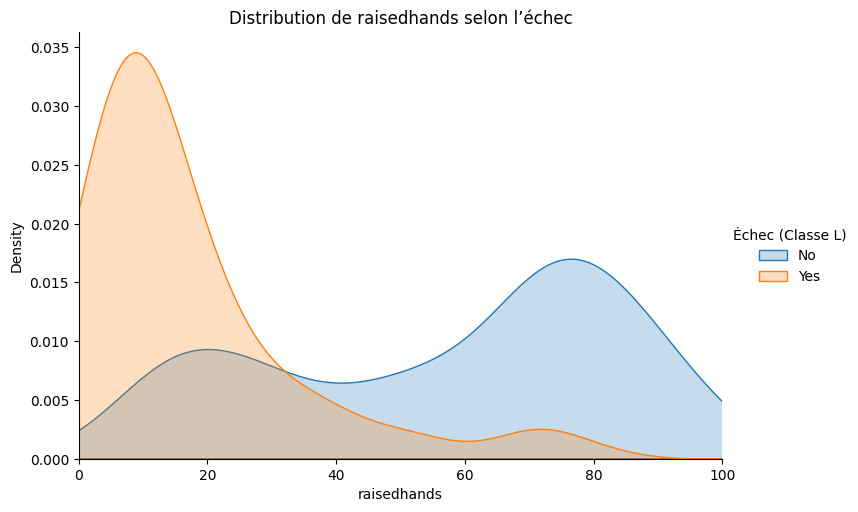

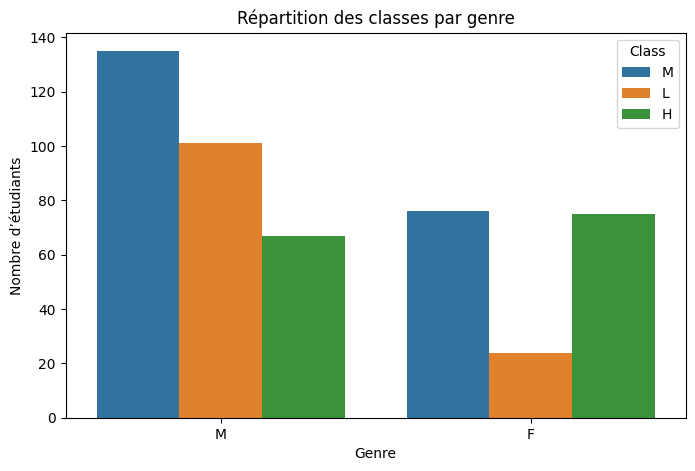

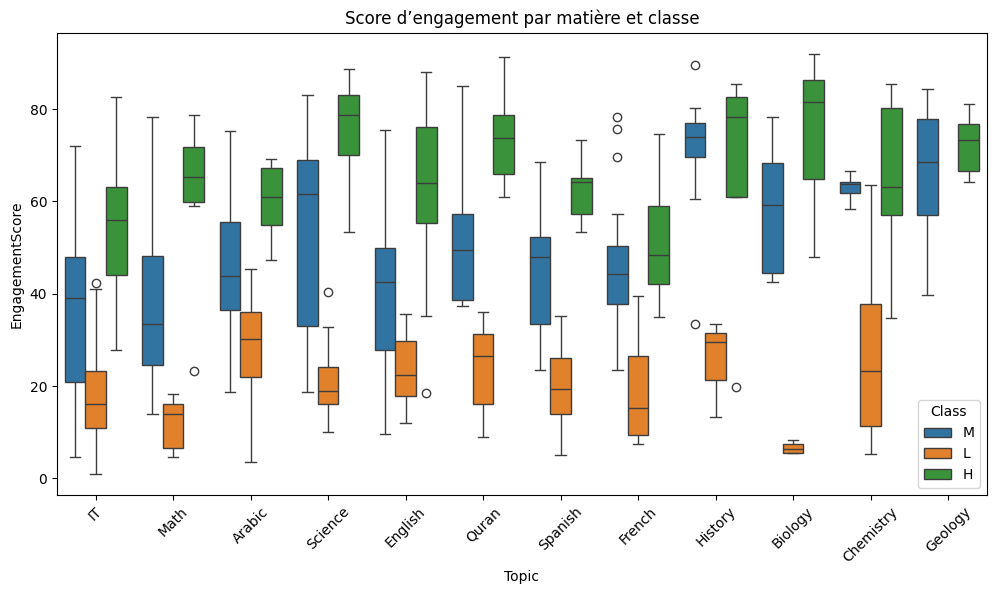

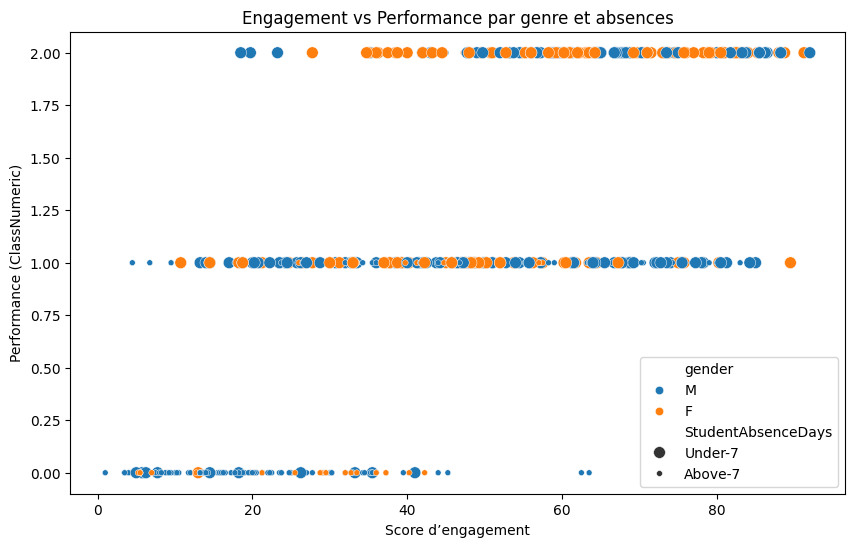

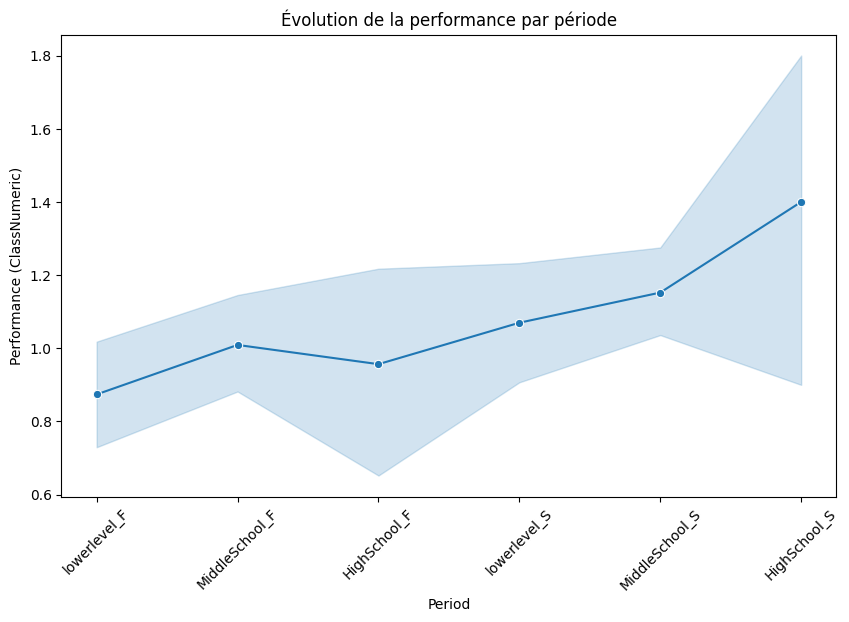

In [22]:
# Portion 3 : Visualisations exploratoires

# Graphique 1 : Distribution de raisedhands selon l’échec (FacetGrid corrigé)
Facetgrid = sns.FacetGrid(df, hue='Failed', height=5, aspect=1.5)
Facetgrid.map(sns.kdeplot, 'raisedhands', fill=True)  # Remplacement de shade par fill
Facetgrid.set(xlim=(0, df['raisedhands'].max()))
Facetgrid.add_legend(title='Échec (Classe L)')
plt.title('Distribution de raisedhands selon l’échec')
plt.savefig('raisedhands_distribution.png', dpi=300)
plt.show()

# Graphique 2 : Répartition des classes par genre
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender', hue='Class')
plt.title('Répartition des classes par genre')
plt.xlabel('Genre')
plt.ylabel('Nombre d’étudiants')
plt.savefig('class_by_gender.png', dpi=300)
plt.show()

# Graphique 3 : Score d’engagement par matière et classe (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Topic', y='EngagementScore', hue='Class')
plt.title('Score d’engagement par matière et classe')
plt.xticks(rotation=45)
plt.savefig('engagement_by_topic_class.png', dpi=300)
plt.show()

# Graphique 4 : Engagement vs Performance par genre et absences (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='EngagementScore', y='ClassNumeric', hue='gender', size='StudentAbsenceDays')
plt.title('Engagement vs Performance par genre et absences')
plt.xlabel('Score d’engagement')
plt.ylabel('Performance (ClassNumeric)')
plt.savefig('engagement_vs_performance.png', dpi=300)
plt.show()

# Graphique 5 : Évolution de la performance par période (Line Plot)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Period', y='ClassNumeric', marker='o')
plt.title('Évolution de la performance par période')
plt.xticks(rotation=45)
plt.ylabel('Performance (ClassNumeric)')
plt.savefig('performance_by_period.png', dpi=300)
plt.show()


Rapport de classification :
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        43
           1       0.73      0.73      0.73        63
           2       0.73      0.71      0.72        38

    accuracy                           0.76       144
   macro avg       0.77      0.77      0.77       144
weighted avg       0.76      0.76      0.76       144



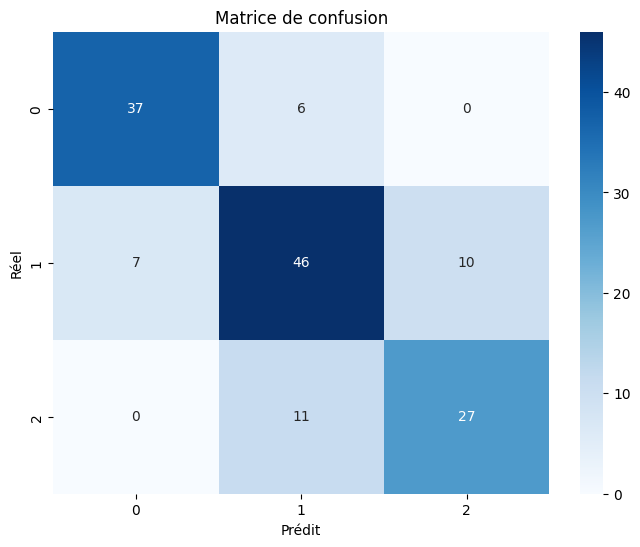


Importance des caractéristiques :
                         Feature  Importance
1               VisITedResources    0.242184
0                    raisedhands    0.209739
2              AnnouncementsView    0.183634
3                     Discussion    0.145259
4     StudentAbsenceDays_Under-7    0.138177
5      ParentAnsweringSurvey_Yes    0.048144
6  ParentschoolSatisfaction_Good    0.032863


In [23]:
# Portion 4 : Analyse prédictive avec RandomForest

# Préparation des données pour le modèle
X = df[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
        'StudentAbsenceDays', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction']]
X = pd.get_dummies(X, drop_first=True)  # Encodage des variables catégoriques
y = df['ClassNumeric']

# Division en ensembles d’entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraînement du modèle RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prédictions
y_pred = rf.predict(X_test)

# Évaluation du modèle
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Importance des caractéristiques
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nImportance des caractéristiques :")
print(feature_importance)

# Sauvegarde de l’importance des caractéristiques
feature_importance.to_csv('feature_importance.csv', index=False)

# Ajout des prédictions au dataset
df['PredictedClass'] = rf.predict(pd.get_dummies(df[['raisedhands', 'VisITedResources', 'AnnouncementsView',
                                                     'Discussion', 'StudentAbsenceDays',
                                                     'ParentAnsweringSurvey', 'ParentschoolSatisfaction']],
                                                     drop_first=True))
df['PredictedClass'] = df['PredictedClass'].map({0: 'L', 1: 'M', 2: 'H'})
df.to_csv('student_data_enriched.csv', index=False)


Rapport de classification :
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        43
           1       0.73      0.73      0.73        63
           2       0.73      0.71      0.72        38

    accuracy                           0.76       144
   macro avg       0.77      0.77      0.77       144
weighted avg       0.76      0.76      0.76       144



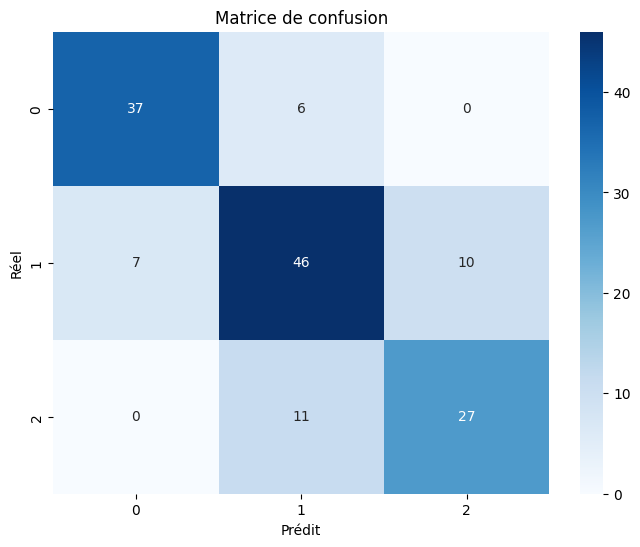


Importance des caractéristiques :
                         Feature  Importance
1               VisITedResources    0.242184
0                    raisedhands    0.209739
2              AnnouncementsView    0.183634
3                     Discussion    0.145259
4     StudentAbsenceDays_Under-7    0.138177
5      ParentAnsweringSurvey_Yes    0.048144
6  ParentschoolSatisfaction_Good    0.032863


In [24]:
# Portion 4 : Analyse prédictive avec RandomForest

# Préparation des données pour le modèle
X = df[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
        'StudentAbsenceDays', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction']]
X = pd.get_dummies(X, drop_first=True)  # Encodage des variables catégoriques
y = df['ClassNumeric']

# Division en ensembles d’entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraînement du modèle RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prédictions
y_pred = rf.predict(X_test)

# Évaluation du modèle
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Importance des caractéristiques
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nImportance des caractéristiques :")
print(feature_importance)

# Sauvegarde de l’importance des caractéristiques
feature_importance.to_csv('feature_importance.csv', index=False)

# Ajout des prédictions au dataset
df['PredictedClass'] = rf.predict(pd.get_dummies(df[['raisedhands', 'VisITedResources', 'AnnouncementsView',
                                                     'Discussion', 'StudentAbsenceDays',
                                                     'ParentAnsweringSurvey', 'ParentschoolSatisfaction']],
                                                     drop_first=True))
df['PredictedClass'] = df['PredictedClass'].map({0: 'L', 1: 'M', 2: 'H'})
df.to_csv('student_data_enriched.csv', index=False)

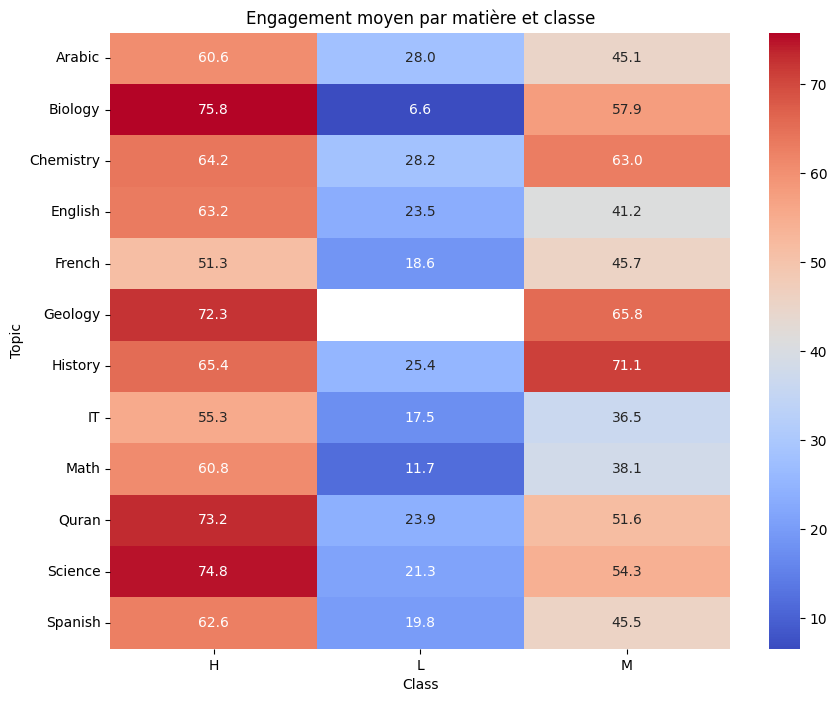

In [25]:
# Portion 5 : Heatmap de l’engagement moyen par matière et classe
plt.figure(figsize=(10, 8))
pivot_table = df.pivot_table(values='EngagementScore', index='Topic', columns='Class', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Engagement moyen par matière et classe')
plt.savefig('engagement_heatmap.png', dpi=300)
plt.show()